<a href="https://colab.research.google.com/github/202422/Online-Shoppers-Purchasing-Intention/blob/main/Data%20Cleaning/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages import

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene, zscore

In [4]:
df = pd.read_csv('/content/online_shoppers_intention.csv')

In [5]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Dataset is correctly imported. Let's dive into the cleaning tasks**

# **I. Delete irrelevant features**

In [7]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
# Create lists of quantitative and qualitative features
quantitative_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
qualitative_features = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']

In [9]:
quantitative_features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

In [10]:
qualitative_features

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

**The ExitRates column is very specific to a page and doesn't make sense in this dataset.**

**But first of all let's check his effect on target variable**

In [11]:
# Applying Student's t-test to determine whether the mean of ExitRates with a
# revenue value of 'False' significantly differs from the mean of ExitRates with
# a revenue value of 'True'.
# I will first check the equality of variances.
# Null Hypothesis (H₀): The variances of the two groups are equal

group1 = df.loc[(df["Revenue"]==False),"ExitRates"]
group2 = df.loc[(df["Revenue"]==True),"ExitRates"]
stat, p_value = levene(group1, group2)
print("Levene's test statistic:", stat)
print("p-value:", p_value)


Levene's test statistic: 435.94122643270674
p-value: 3.636108513062532e-95


**We can conclude that Variances are significantly different.**

**So let's perform a Welch's t-test**

In [12]:
# Null Hypothesis (H₀): The mean ExitRates for Revenue = False is equal to the mean ExitRates for Revenue = True

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print("Welch's t-test t-statistic:", t_stat)
print("p-value:", p_value)

Welch's t-test t-statistic: 44.33213022344043
p-value: 0.0


**Since the p-value is effectively zero (far less than any common significance level, such as 𝛼=0.05), I can reject the null hypothesis with high confidence.**

**Therefore I will keep this feature**

# **II. Handling missing values and outliers**

## **1. Missing Values**

In [13]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


**The dataset has no missing values, as each column contains 0 missing entries**

## **2. Outliers**

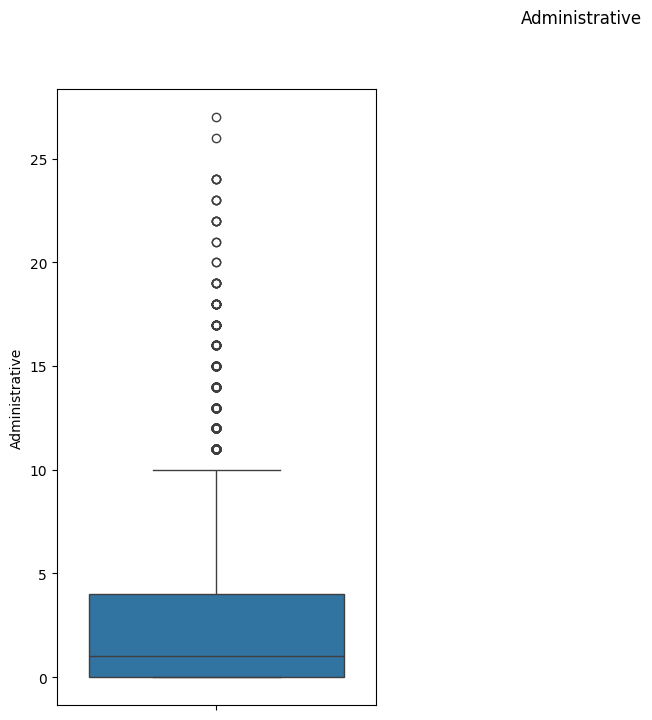

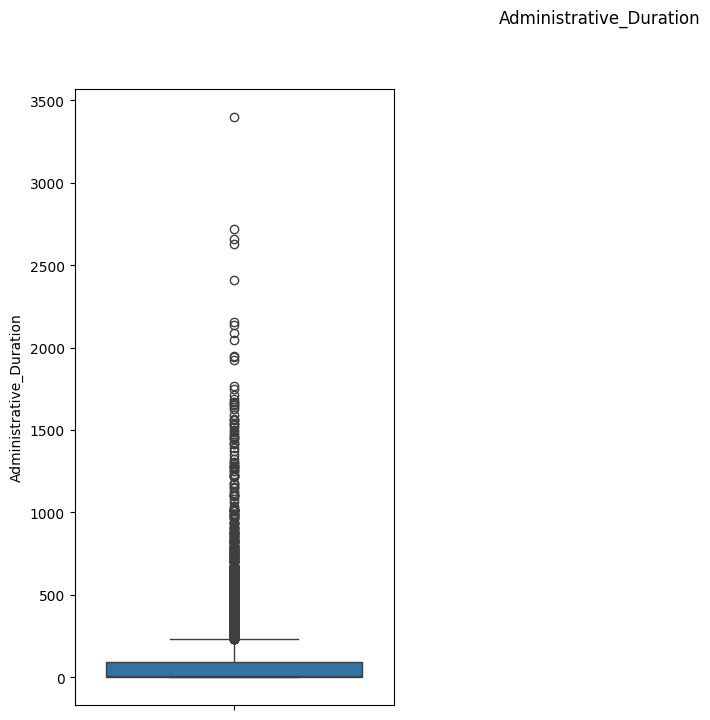

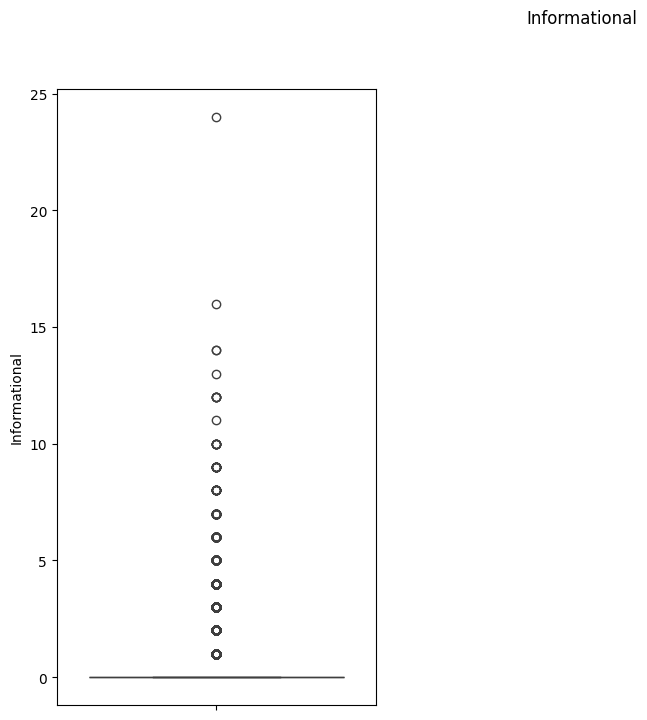

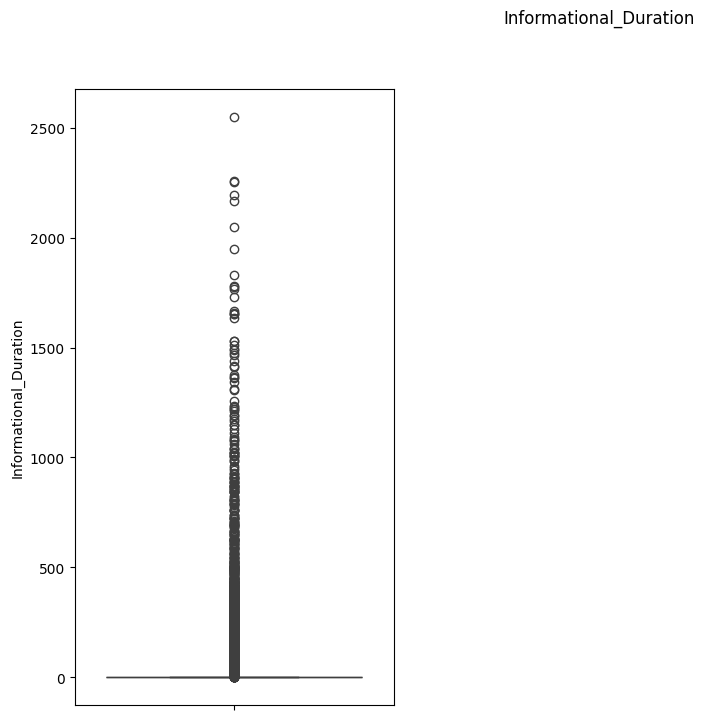

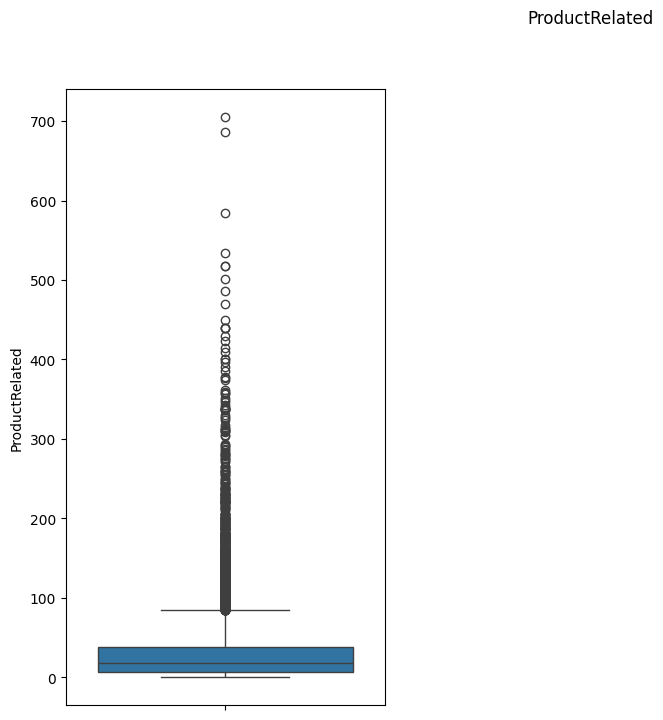

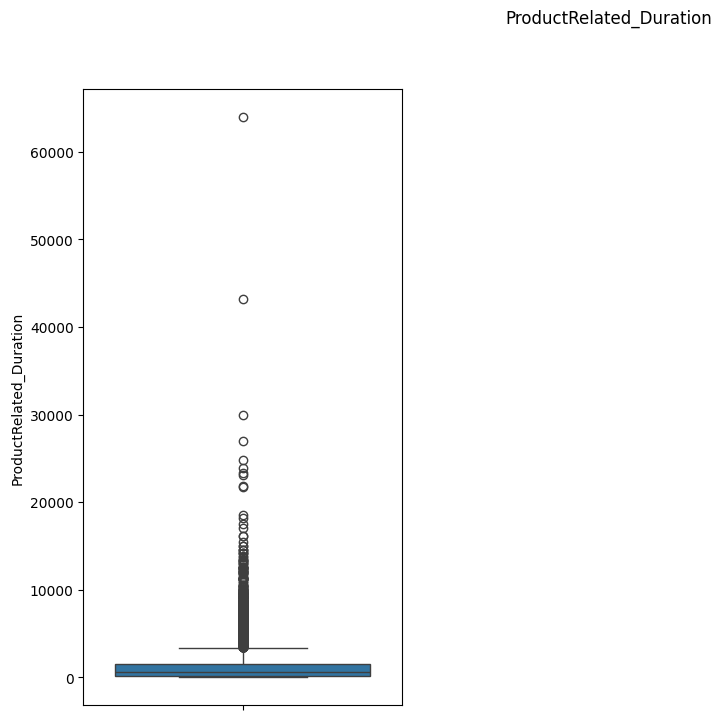

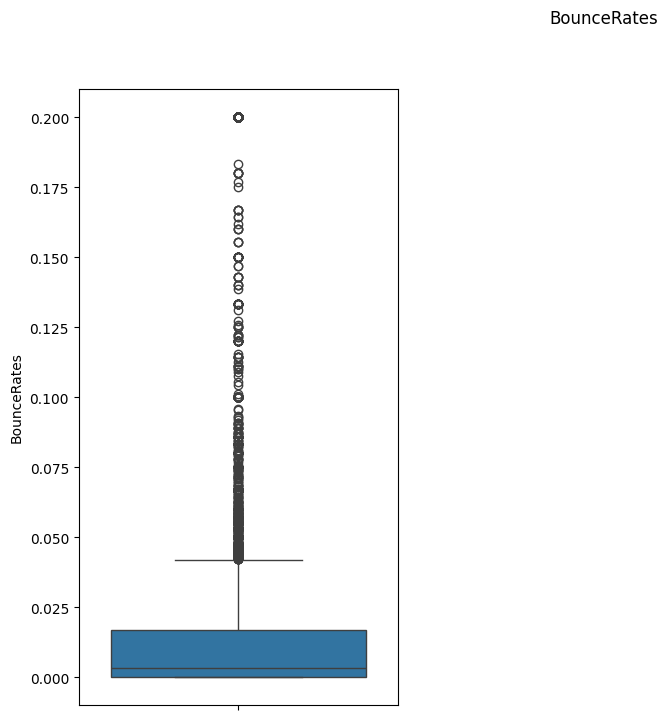

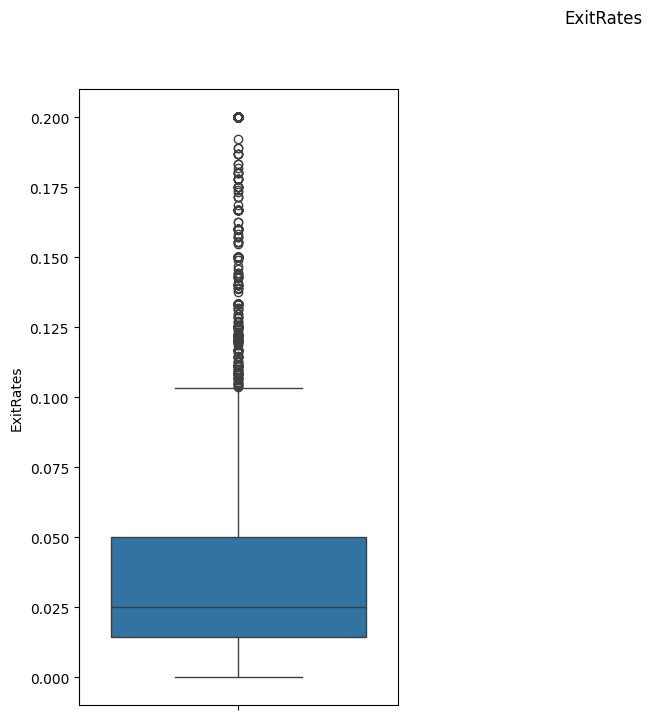

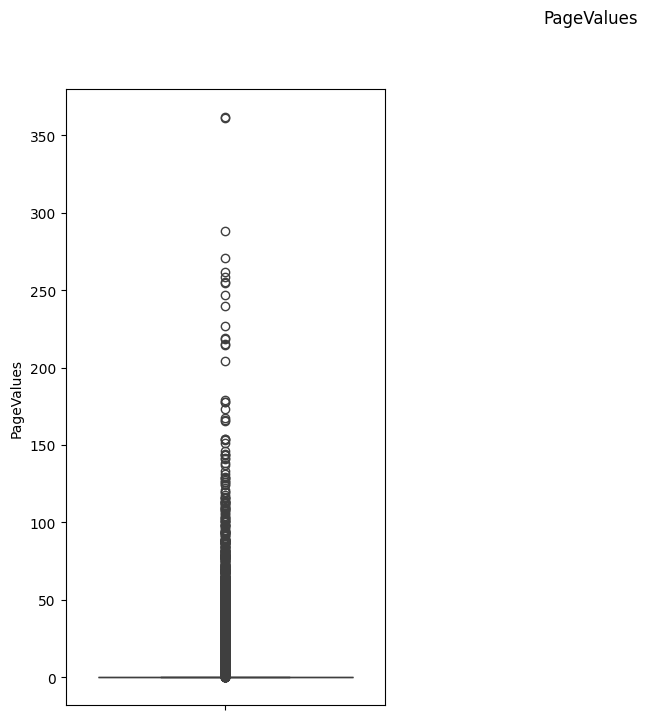

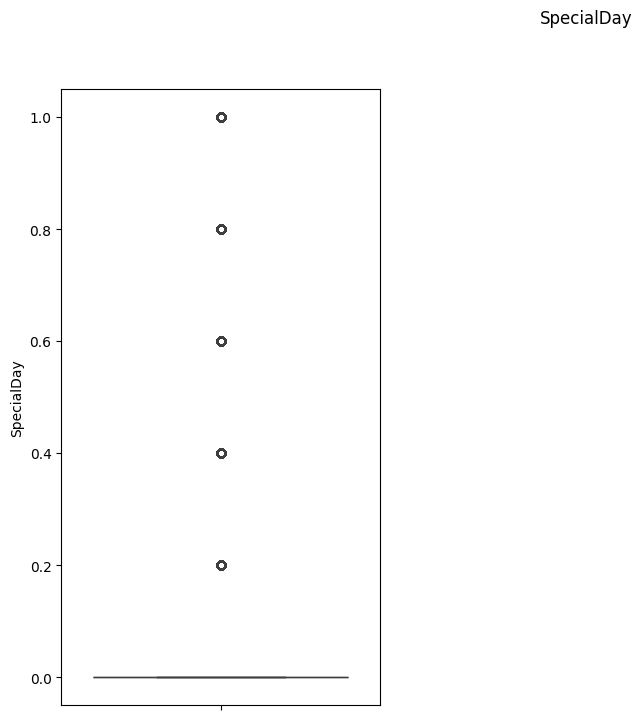

In [14]:
# Plotting a boxplot for each column
for col in quantitative_features:
    plt.figure(figsize = (14,8))
    plt.suptitle(col)
    plt.subplot(1,3,1)
    sns.boxplot(y = col, data = df)

In [24]:
# Displaying the total number of outliers per column
for col in quantitative_features:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  print(col, (df[(df[col]>upper_bound) | (df[col]<lower_bound)]).shape[0] )


Administrative 404
Administrative_Duration 1172
Informational 2631
Informational_Duration 2405
ProductRelated 987
ProductRelated_Duration 961
BounceRates 1551
ExitRates 1099
PageValues 2730
SpecialDay 1251


**In the column SpecialDay, there are 1,251 outliers out of 12,330 instances, which can be explained by the few occurrences of special days in a year. Therefore, I am going to remove all outliers except those in SpecialDay column**

In [26]:
quantitative_features2 = quantitative_features.copy()
quantitative_features2.remove('SpecialDay')

In [32]:
# Calculating zscore of quantitative features except 'SpecialDay'
z_scores = zscore(df[quantitative_features2])
z_score_bool = abs(z_scores) < 2
z_score_bool_series = z_score_bool.all(axis=1)

In [35]:
# Number of instances that deviate by more than two standard deviations from the mean for each quantitative feature
(12330 - z_score_bool.sum())

,0
Administrative,782
Administrative_Duration,429
Informational,482
Informational_Duration,366
ProductRelated,504
ProductRelated_Duration,454
BounceRates,796
ExitRates,865
PageValues,519


In [36]:
# Keeping only rows without outlier. In that case, an outlier is a value that deviates by 2 stantard deviation from mean
df_inliers = df[z_score_bool_series]
df_inliers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


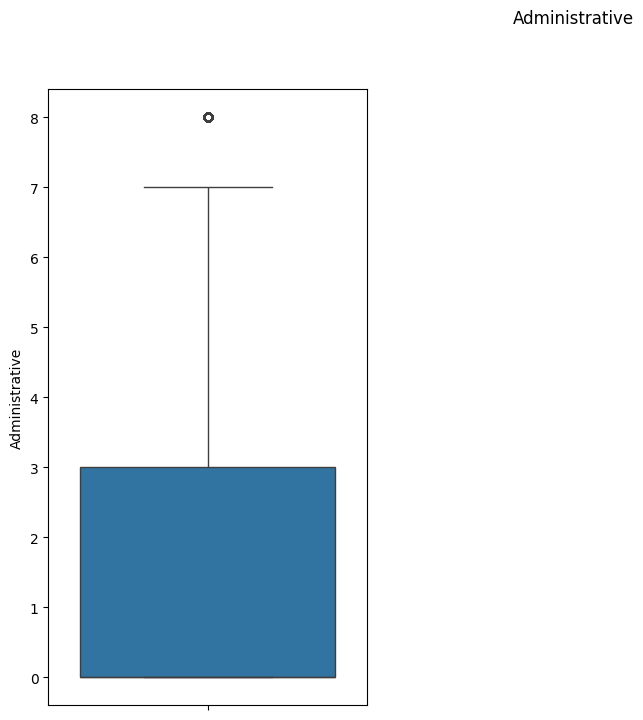

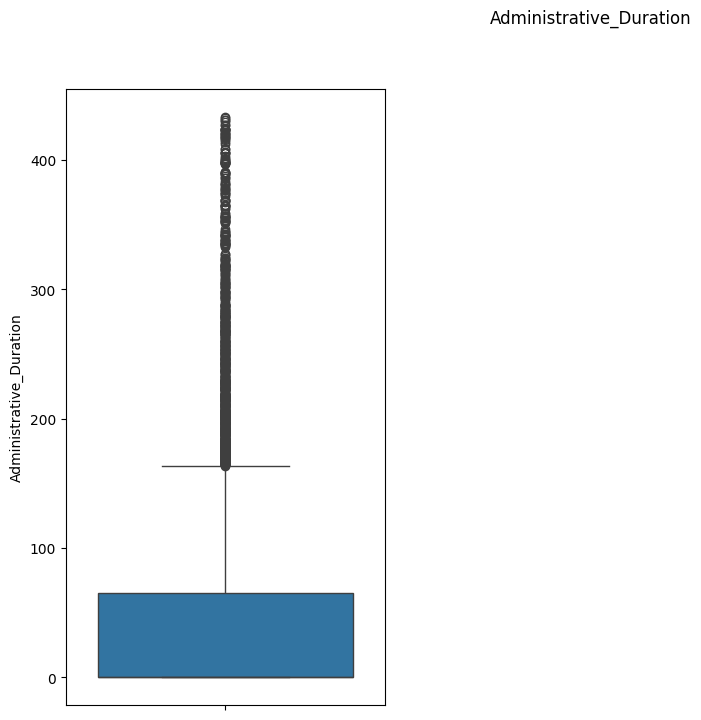

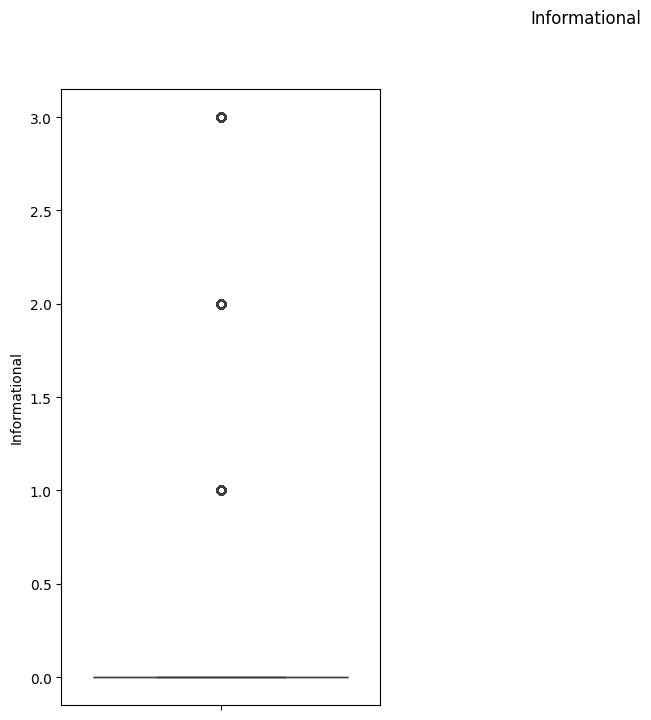

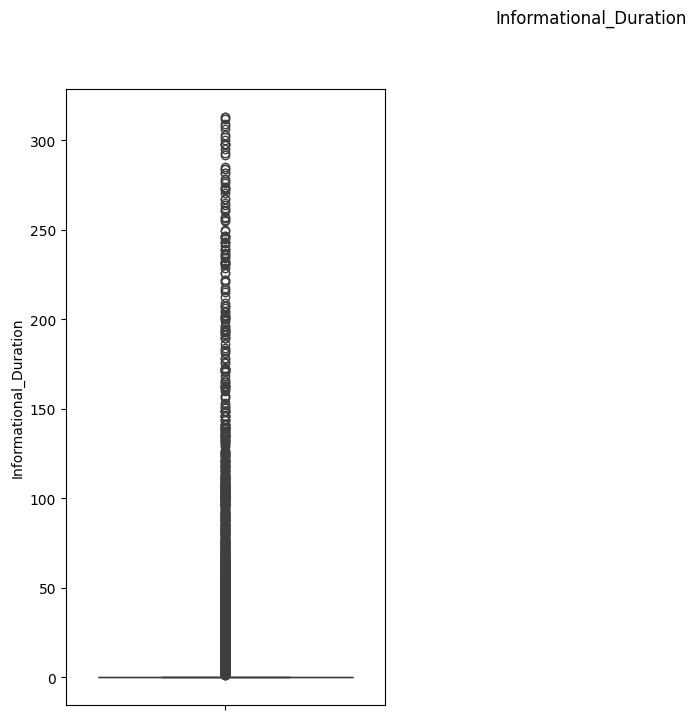

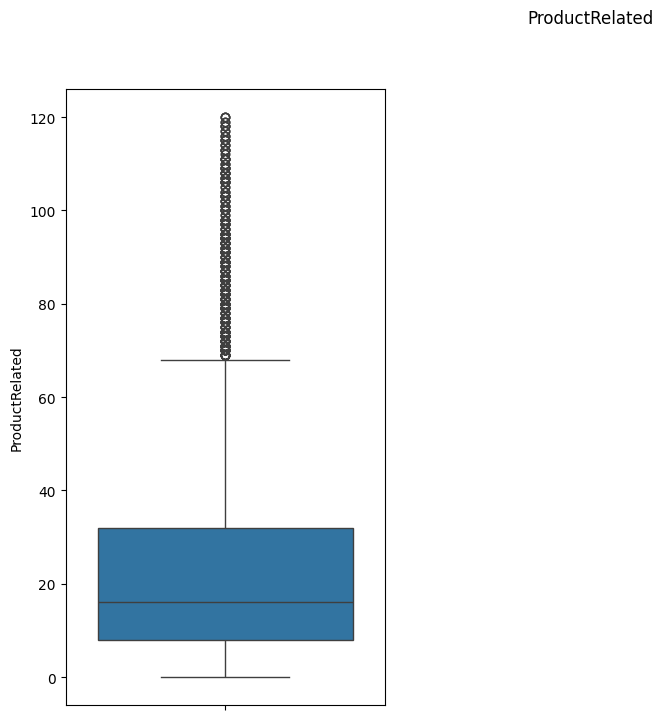

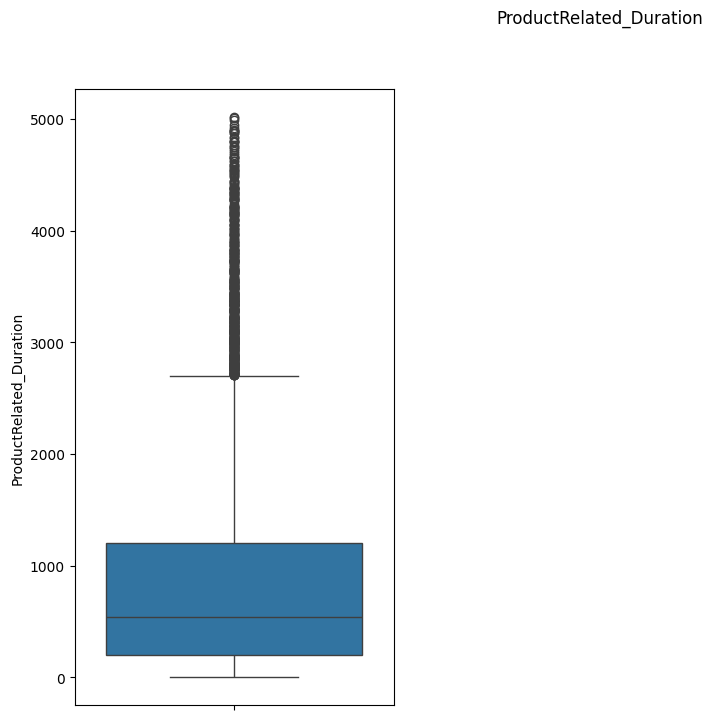

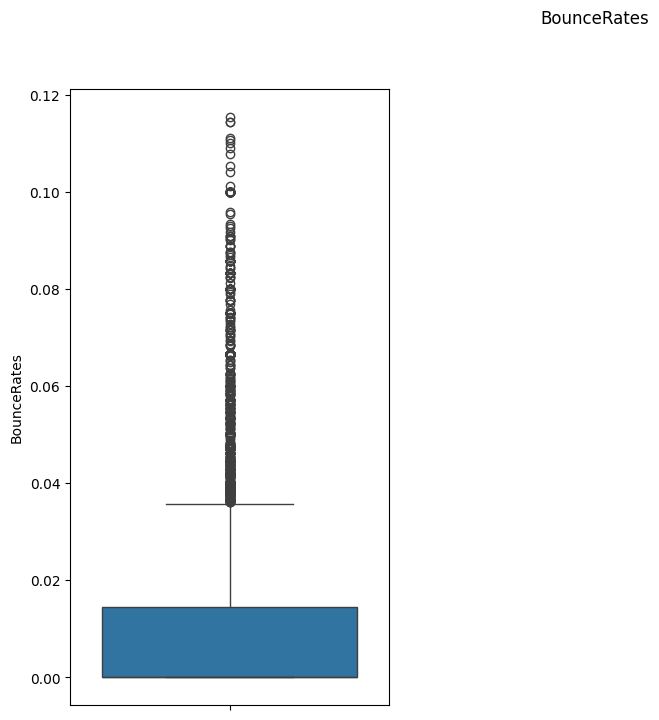

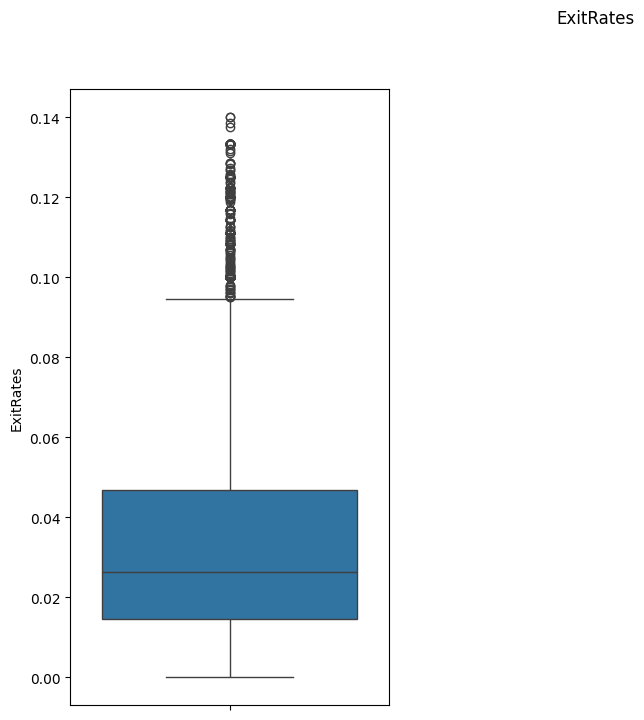

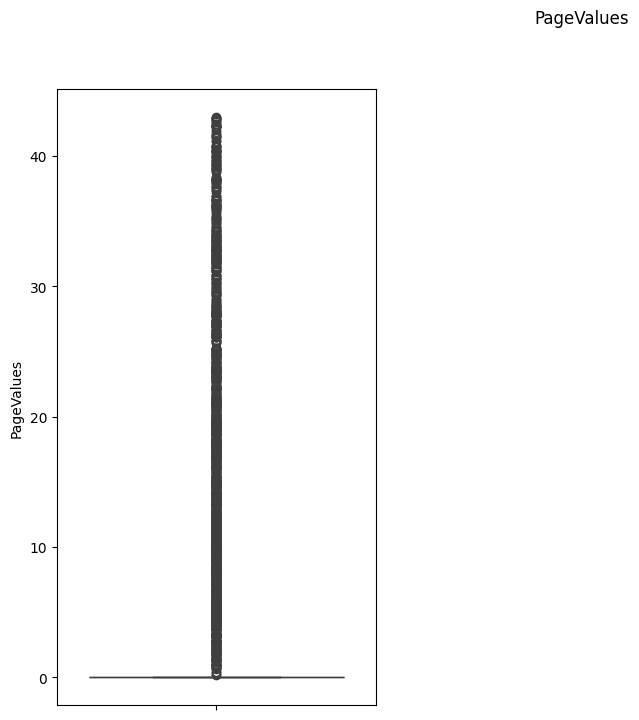

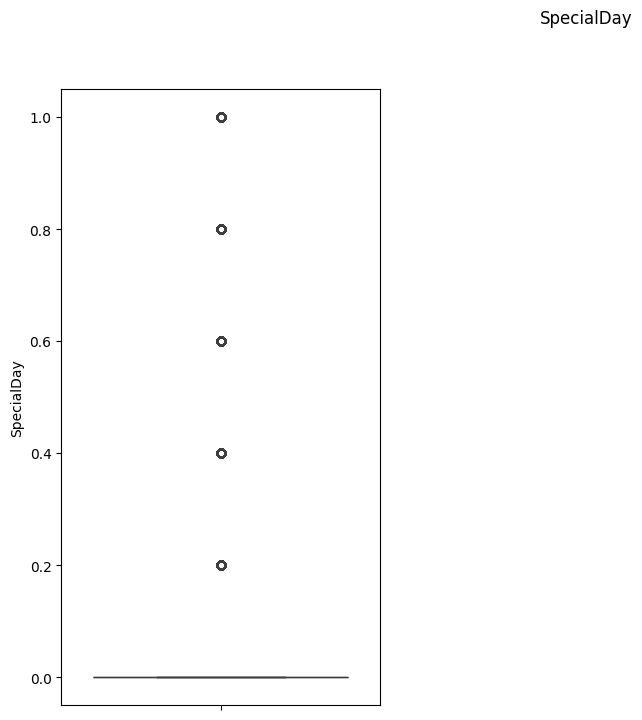

In [38]:
# Plotting a boxplot for each column
for col in quantitative_features:
    plt.figure(figsize = (14,8))
    plt.suptitle(col)
    plt.subplot(1,3,1)
    sns.boxplot(y = col, data = df_inliers)

In [39]:
df_inliers.to_csv('Cleaned_dataset.csv', index=False)